In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn .model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("/content/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df["total_bedrooms"].skew()

3.459546331523342

In [ ]:
df["total_bedrooms"].kurt()

21.985575060645203

In [ ]:
df["total_bedrooms"].fillna(df["total_bedrooms"].median(),inplace=True)

<ipython-input-10-c7d435161b2a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_bedrooms"].fillna(df["total_bedrooms"].median(),inplace=True)


In [ ]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


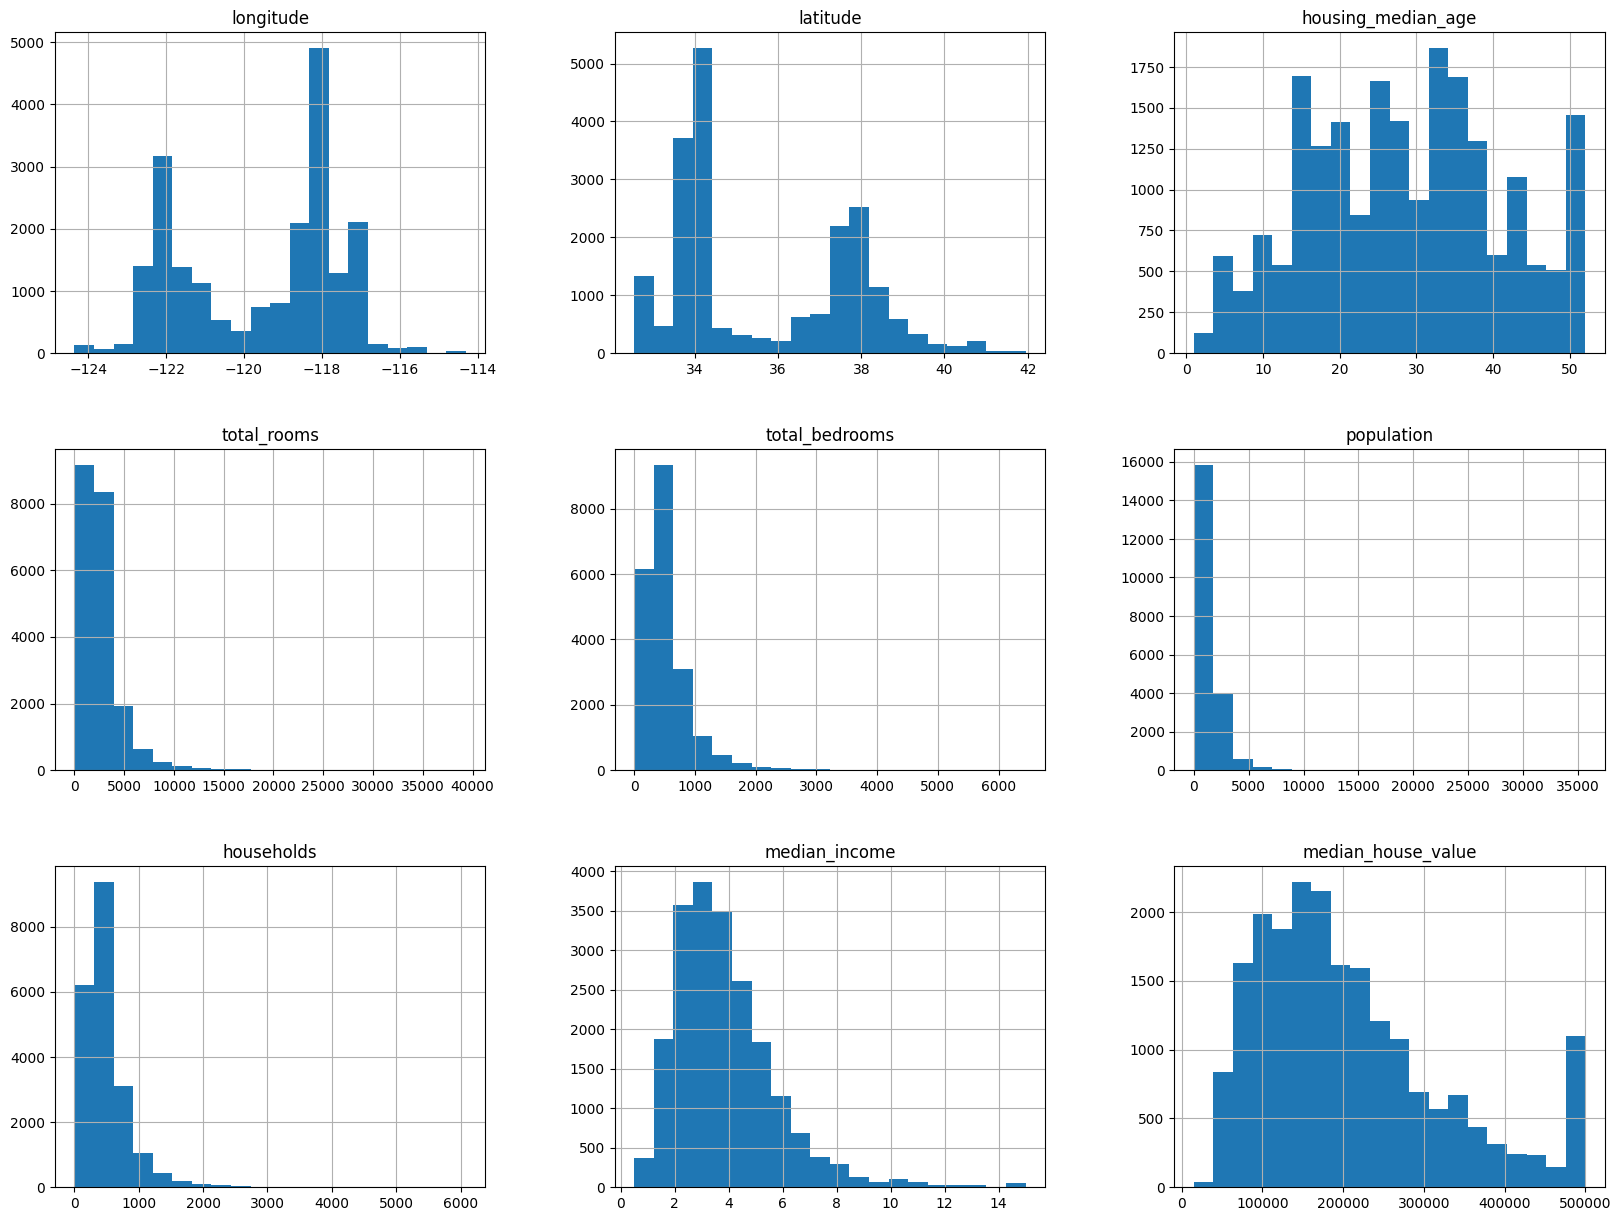

longitude Skewness: -0.2978012079524362
latitude Skewness: 0.46595300370997006
housing_median_age Skewness: 0.060330637599136865
total_rooms Skewness: 4.147343450632158
total_bedrooms Skewness: 3.4811408631013117
population Skewness: 4.93585822672712
households Skewness: 3.410437711667147
median_income Skewness: 1.6466567021344465
median_house_value Skewness: 0.9777632739098341


In [ ]:
column = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households",
          "median_income","median_house_value"]
df[column].hist(bins=20, figsize=(20, 15))
plt.show()

for col in column:
    skewness = df[col].skew()
    print(f'{col} Skewness: {skewness}')

In [ ]:
from scipy.stats import shapiro
for col in column:
    stat, p_value = shapiro(df[col].dropna())
    print(f'{col} Shapiro-Wilk p-value: {p_value}')

longitude Shapiro-Wilk p-value: 4.1213064328225716e-78
latitude Shapiro-Wilk p-value: 4.4951610612854584e-82
housing_median_age Shapiro-Wilk p-value: 1.5602225615811627e-47
total_rooms Shapiro-Wilk p-value: 4.778334967598702e-104
total_bedrooms Shapiro-Wilk p-value: 1.1837988074523472e-100
population Shapiro-Wilk p-value: 1.7444774799024147e-102
households Shapiro-Wilk p-value: 1.837931966843392e-99
median_income Shapiro-Wilk p-value: 6.560004141576977e-79
median_house_value Shapiro-Wilk p-value: 1.3673019915893023e-74


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20640.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
from scipy.stats import zscore

for col in column:
    outliers = (abs(zscore(df[col].dropna())) > 3).sum()
    print(f'{col} Number of outliers: {outliers}')

longitude Number of outliers: 0
latitude Number of outliers: 0
housing_median_age Number of outliers: 0
total_rooms Number of outliers: 373
total_bedrooms Number of outliers: 375
population Number of outliers: 342
households Number of outliers: 363
median_income Number of outliers: 345
median_house_value Number of outliers: 0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

column = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households",
          "median_income","median_house_value"]

scaler = MinMaxScaler()
df[column] = scaler.fit_transform(df[column])

print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.211155  0.567481            0.784314     0.022331        0.019863   
1   0.212151  0.565356            0.392157     0.180503        0.171477   
2   0.210159  0.564293            1.000000     0.037260        0.029330   
3   0.209163  0.564293            1.000000     0.032352        0.036313   
4   0.209163  0.564293            1.000000     0.041330        0.043296   

   population  households  median_income  median_house_value ocean_proximity  
0    0.008941    0.020556       0.539668            0.902266        NEAR BAY  
1    0.067210    0.186976       0.538027            0.708247        NEAR BAY  
2    0.013818    0.028943       0.466028            0.695051        NEAR BAY  
3    0.015555    0.035849       0.354699            0.672783        NEAR BAY  
4    0.015752    0.042427       0.230776            0.674638        NEAR BAY  


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.476125,0.328572,0.541951,0.066986,0.083153,0.039869,0.081983,0.232464,0.395579
std,0.199555,0.226988,0.246776,0.055486,0.065083,0.031740,0.062873,0.131020,0.237928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253984,0.147715,0.333333,0.036771,0.045934,0.021974,0.045881,0.142308,0.215671
50%,0.583665,0.182784,0.549020,0.054046,0.067349,0.032596,0.067094,0.209301,0.339588
75%,0.631474,0.549416,0.705882,0.080014,0.099666,0.048264,0.099326,0.292641,0.514897
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df = pd.get_dummies(df, columns=["ocean_proximity"])
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.211155  0.567481            0.784314     0.022331        0.019863   
1   0.212151  0.565356            0.392157     0.180503        0.171477   
2   0.210159  0.564293            1.000000     0.037260        0.029330   
3   0.209163  0.564293            1.000000     0.032352        0.036313   
4   0.209163  0.564293            1.000000     0.041330        0.043296   

   population  households  median_income  median_house_value  \
0    0.008941    0.020556       0.539668            0.902266   
1    0.067210    0.186976       0.538027            0.708247   
2    0.013818    0.028943       0.466028            0.695051   
3    0.015555    0.035849       0.354699            0.672783   
4    0.015752    0.042427       0.230776            0.674638   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                      False                   False                   False   
1   

In [ ]:
df['ocean_proximity_NEAR BAY'] = df['ocean_proximity_NEAR BAY'].astype(int)
df['ocean_proximity_NEAR OCEAN'] = df['ocean_proximity_NEAR OCEAN'].astype(int)
df["ocean_proximity_ISLAND"] = df["ocean_proximity_ISLAND"].astype(int)
df["ocean_proximity_INLAND"] = df["ocean_proximity_INLAND"].astype(int)
df["ocean_proximity_<1H OCEAN"] = df["ocean_proximity_<1H OCEAN"].astype(int)
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.211155  0.567481            0.784314     0.022331        0.019863   
1   0.212151  0.565356            0.392157     0.180503        0.171477   
2   0.210159  0.564293            1.000000     0.037260        0.029330   
3   0.209163  0.564293            1.000000     0.032352        0.036313   
4   0.209163  0.564293            1.000000     0.041330        0.043296   

   population  households  median_income  median_house_value  \
0    0.008941    0.020556       0.539668            0.902266   
1    0.067210    0.186976       0.538027            0.708247   
2    0.013818    0.028943       0.466028            0.695051   
3    0.015555    0.035849       0.354699            0.672783   
4    0.015752    0.042427       0.230776            0.674638   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                          0                       0                       0   
1   

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.476125,0.328572,0.541951,0.066986,0.083153,0.039869,0.081983,0.232464,0.395579,0.442636,0.317393,0.000242,0.110950,0.128779
std,0.199555,0.226988,0.246776,0.055486,0.065083,0.031740,0.062873,0.131020,0.237928,0.496710,0.465473,0.015563,0.314077,0.334963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253984,0.147715,0.333333,0.036771,0.045934,0.021974,0.045881,0.142308,0.215671,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.583665,0.182784,0.549020,0.054046,0.067349,0.032596,0.067094,0.209301,0.339588,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.631474,0.549416,0.705882,0.080014,0.099666,0.048264,0.099326,0.292641,0.514897,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


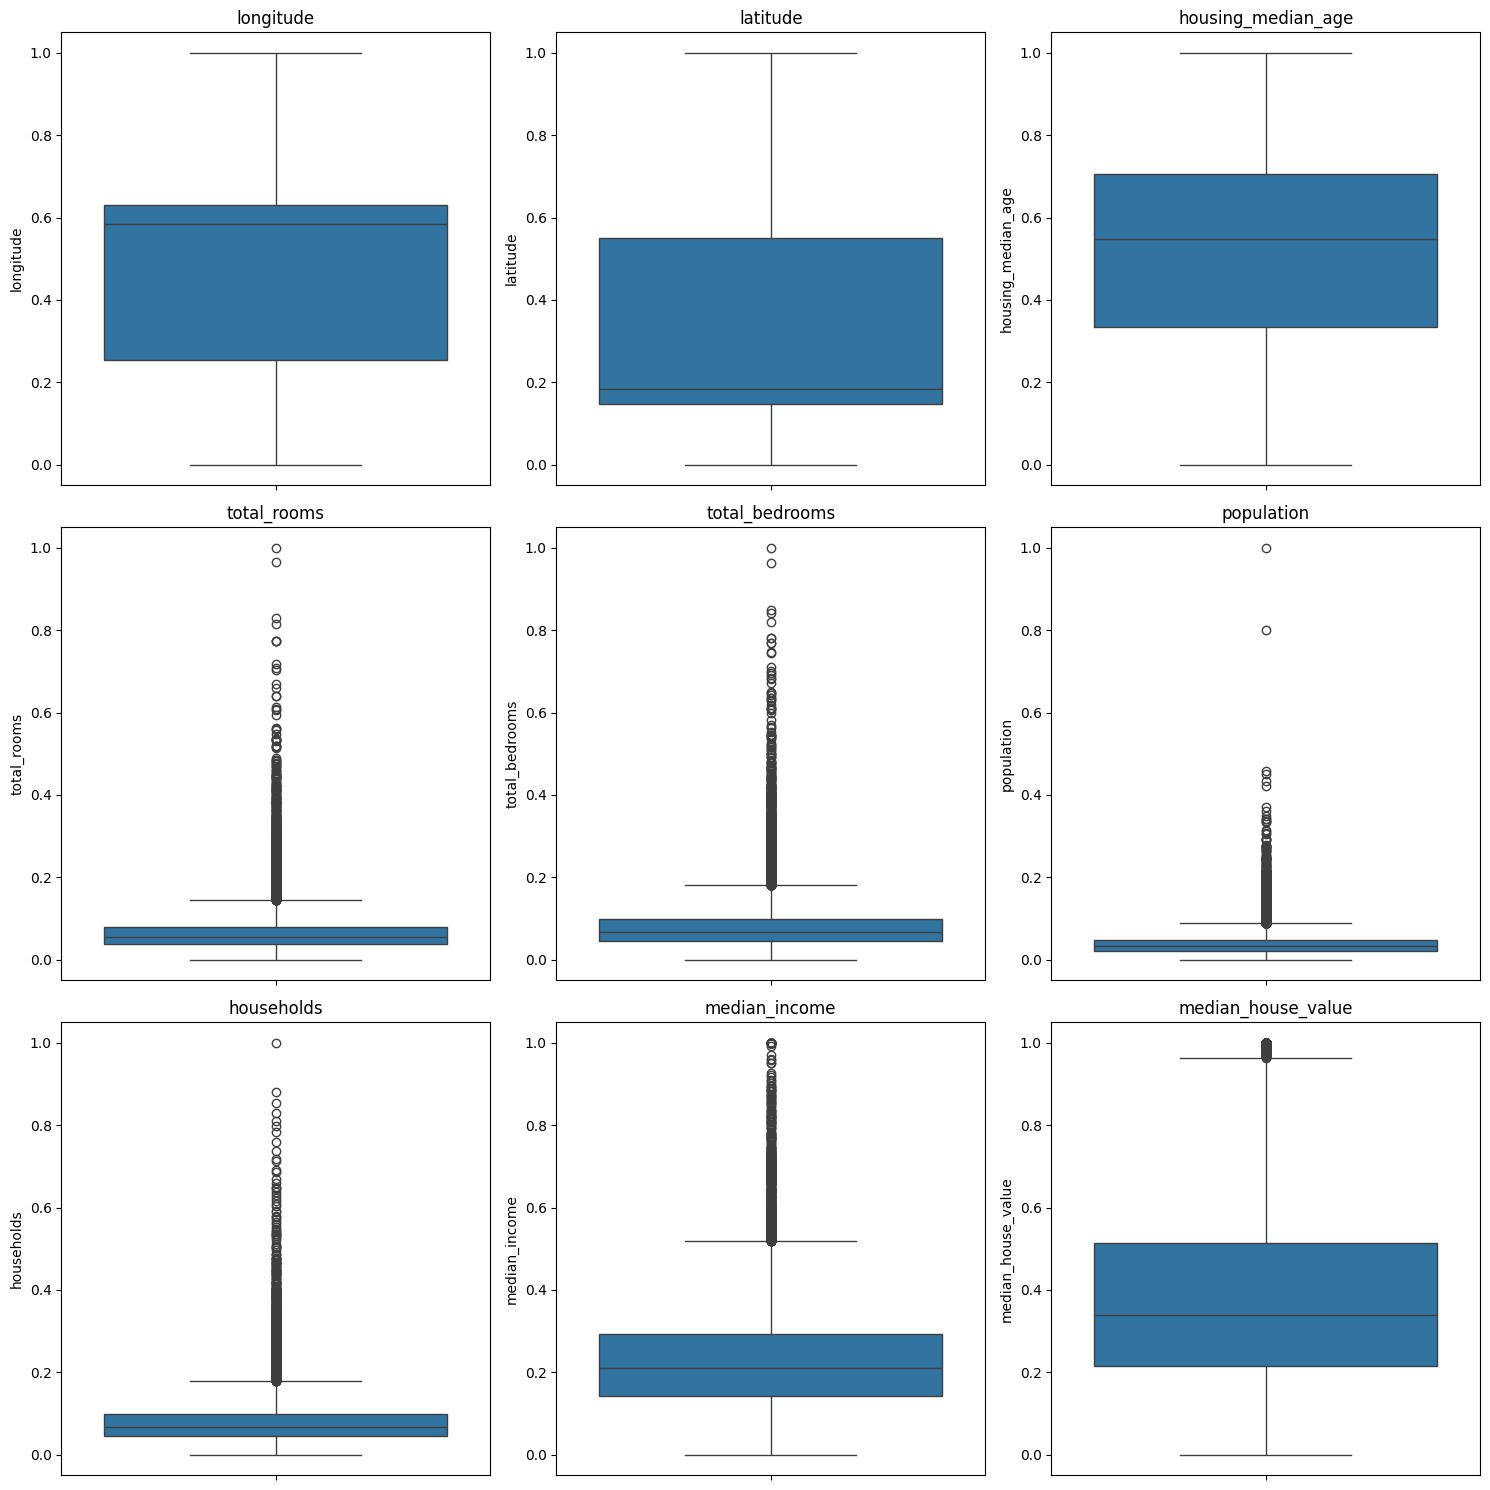

In [ ]:
num_cols = len(column)

num_rows = (num_cols // 3) + (num_cols % 3 > 0)

plt.figure(figsize=(15, num_rows * 5))

for i, col in enumerate(column, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import zscore

for col in column:
    outliers = (abs(zscore(df[col].dropna())) > 3).sum()
    print(f'{col} Number of outliers: {outliers}')

longitude Number of outliers: 0
latitude Number of outliers: 0
housing_median_age Number of outliers: 0
total_rooms Number of outliers: 373
total_bedrooms Number of outliers: 375
population Number of outliers: 342
households Number of outliers: 363
median_income Number of outliers: 345
median_house_value Number of outliers: 0


In [ ]:
def identify_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return (data < lower_bound) | (data > upper_bound)

for col in column:
    outlier_condition = identify_outliers_iqr(df[col])
    num_outliers = outlier_condition.sum()
    print(f'{col} Number of outliers (IQR method): {num_outliers}')

longitude Number of outliers (IQR method): 0
latitude Number of outliers (IQR method): 0
housing_median_age Number of outliers (IQR method): 0
total_rooms Number of outliers (IQR method): 1287
total_bedrooms Number of outliers (IQR method): 1306
population Number of outliers (IQR method): 1196
households Number of outliers (IQR method): 1220
median_income Number of outliers (IQR method): 681
median_house_value Number of outliers (IQR method): 1071


In [ ]:
from scipy.stats import zscore

for col in column:
    z_scores = zscore(df[col].dropna())
    outlier_count = (abs(z_scores) > 3).sum()

for col in column:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error,mean_absolute_error

def evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    MSE = root_mean_squared_error(y_test, predictions)
    RMSE = root_mean_squared_error(y_test, predictions)
    MAE = mean_absolute_error(y_test, predictions)
    R2 = r2_score(y_test, predictions)

    return MSE,RMSE,MAE,R2

X_original = df.drop(columns=['median_house_value'])
y_original = df['median_house_value']
metrics_original = evaluate_model(X_original, y_original)

df_no_outliers = df[(z_scores < 3) & (z_scores > -3)]
X_no_outliers = df_no_outliers.drop(columns=['median_house_value'])
y_no_outliers = df_no_outliers['median_house_value']
metrics_no_outliers = evaluate_model(X_no_outliers, y_no_outliers)

for col in column:
    df[col] = np.where(df[col] > upper_bound, np.log(upper_bound), df[col])
X_transformed = df.drop(columns=['median_house_value'])
y_transformed = df['median_house_value']
metrics_transformed = evaluate_model(X_transformed, y_transformed)

print("Metrics with outliers:", metrics_original)
print("Metrics after removing outliers:", metrics_no_outliers)
print("Metrics after transforming outliers:", metrics_transformed)


Metrics with outliers: (0.18348248728603234, 0.18348248728603234, 0.126300344203103, 0.24162351067666654)
Metrics after removing outliers: (0.18348248728603234, 0.18348248728603234, 0.126300344203103, 0.24162351067666654)
Metrics after transforming outliers: (0.185687640277403, 0.185687640277403, 0.1301288297807745, 0.19381699226785254)


In [ ]:
X = df.drop(columns=["median_house_value"])
y = df["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
MSE = root_mean_squared_error(y_test, predictions)
RMSE = root_mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
R2 = r2_score(y_test, predictions)

print("Mean Squared Error: ",MSE)
print("Root Mean Squared Error: ",RMSE)
print("Mean Absolute Error: ",MAE)
print("R2: ",R2)

Mean Squared Error:  0.185687640277403
Root Mean Squared Error:  0.185687640277403
Mean Absolute Error:  0.1301288297807745
R2:  0.19381699226785254
